In [1]:
from tensorflow.keras.applications import ResNet50
model = ResNet50(weights='imagenet')

102973440/102967424 [==============================] - 1s 0us/step


In [2]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
#Look at the last layer it is 1000 class classifier

In [3]:
#Notice that with each layer image is getting smaller and thicker
!pwd

/content


In [5]:
from tensorflow.keras.preprocessing.image import load_img

pen_img = load_img('pen.jpg', target_size=(224, 224))
pen_no_cap_img = load_img('pen_no_Cap.jpg', target_size=(224, 224))

bottle = load_img('bottle.jpg', target_size=(224, 224))


In [6]:
# Useful function: presents top 5 predictions and probabilities

from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import pandas as pd

def get_top_5_predictions(img):
    x = img_to_array(img)[np.newaxis, ...]
    x = preprocess_input(x)
    preds = decode_predictions(model.predict(x), top=5)
    top_preds = pd.DataFrame(columns=['prediction', 'probability'],
                             index=np.arange(5)+1)
    for i in range(5):
        top_preds.loc[i+1, 'prediction'] = preds[0][i][1]
        top_preds.loc[i+1, 'probability'] = preds[0][i][2] 
    return top_preds

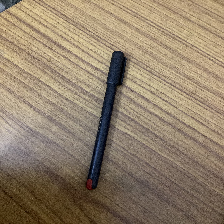

In [7]:
# Display image
pen_img



In [8]:
# Display top 5 predictions

get_top_5_predictions(pen_img)

40960/35363 [==================================] - 0s 0us/step


,prediction,probability
1,nail,0.486432
2,screwdriver,0.298762
3,screw,0.0660915
4,ballpoint,0.0396396
5,hammer,0.031655


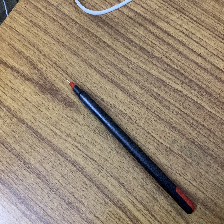

In [9]:
pen_no_cap_img

In [10]:
get_top_5_predictions(pen_no_cap_img)

,prediction,probability
1,ballpoint,0.32031
2,screwdriver,0.219354
3,pencil_box,0.0840013
4,nail,0.0709804
5,racket,0.0597794


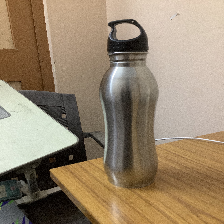

In [11]:
bottle

In [12]:
get_top_5_predictions(bottle)

,prediction,probability
1,water_bottle,0.720767
2,water_jug,0.149463
3,saltshaker,0.0262992
4,pop_bottle,0.0142374
5,coffeepot,0.0111538
